## Задача 1

Для неявного метода:

$u_{n+1}=u_n+Δt⋅λu_{n+1}$

$u_{n+1}=\frac{u_n}{1-\lambda\triangle t}$
​
 .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def explicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

In [3]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает du/dt = lambda u на 0 < t < T с u(t=0) = u0 при помощи неявного метода Эйлера."""
    num_steps = int(T / dt)
    tt = np.linspace(0, T, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = u0
    
    for n in range(num_steps):
        y[n+1] = y[n] / (1 - lam * dt)
    
    return tt, y

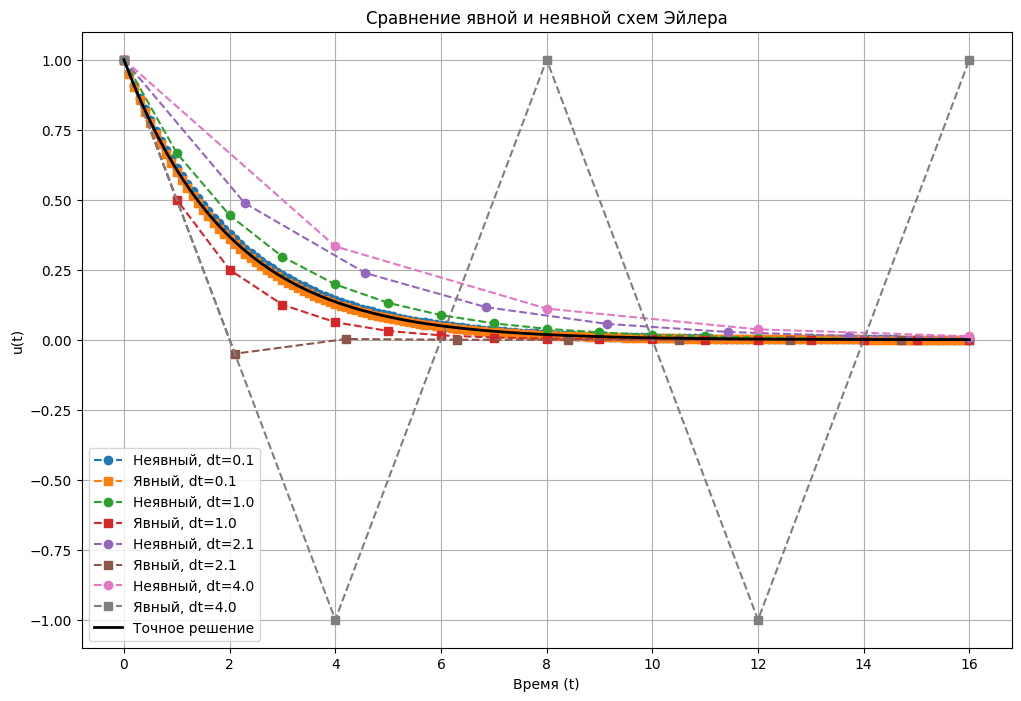

In [4]:
lam = -0.5
u0 = 1.0
T = 8 / abs(lam)

# Шаги интегрирования
dts = [0.1, 1.0, 2.1, 4.0]

plt.figure(figsize=(12, 8))

for dt in dts:
    tt_implicit, y_implicit = implicit_euler_solve(lam, u0, T, dt)
    tt_explicit, y_explicit = explicit_euler_solve(lam, u0, T, dt)
    
    plt.plot(tt_implicit, y_implicit, 'o--', label=f'Неявный, dt={dt}')
    plt.plot(tt_explicit, y_explicit, 's--', label=f'Явный, dt={dt}')

# Аналитическое решение
tt_analytical = np.linspace(0, T, 100)
y_analytical = np.exp(lam * tt_analytical)
plt.plot(tt_analytical, y_analytical, 'k-', lw=2, label='Точное решение')

plt.xlabel('Время (t)')
plt.ylabel('u(t)')
plt.title('Сравнение явной и неявной схем Эйлера')
plt.legend()
plt.grid(True)
plt.show()

## Задача 2

$u_{k+1}=u_k+τAu_k=(I+τA)u_k$
​


In [7]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        Construct the solution for t ∈ [0, T)
    dt : float
        Integration step size τ
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    ndim = a.shape[0]
    
    y = np.zeros((num_steps + 1, ndim))
    y[0, :] = u0
    
    for k in range(num_steps):
        y[k + 1, :] = y[k, :] + dt * a @ y[k, :]
    
    return tt, y

Точное решение через матричную экспоненту

$u(t)=e^{At}u_0$

In [5]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of du/dt = A u with u(0) = u0 at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
        The matrix A.
    u0 : ndarray, shape (ndim,)
        Initial condition.
    tt : ndarray, shape (n,)
        The values of t.
        
    Returns
    -------
    u : ndarray, shape (n, ndim)
        u[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    tt = np.asarray(tt, dtype=float)
    
    u = np.zeros((len(tt), len(u0)))
    for i, t in enumerate(tt):
        u[i, :] = expm(a * t) @ u0
    
    return u

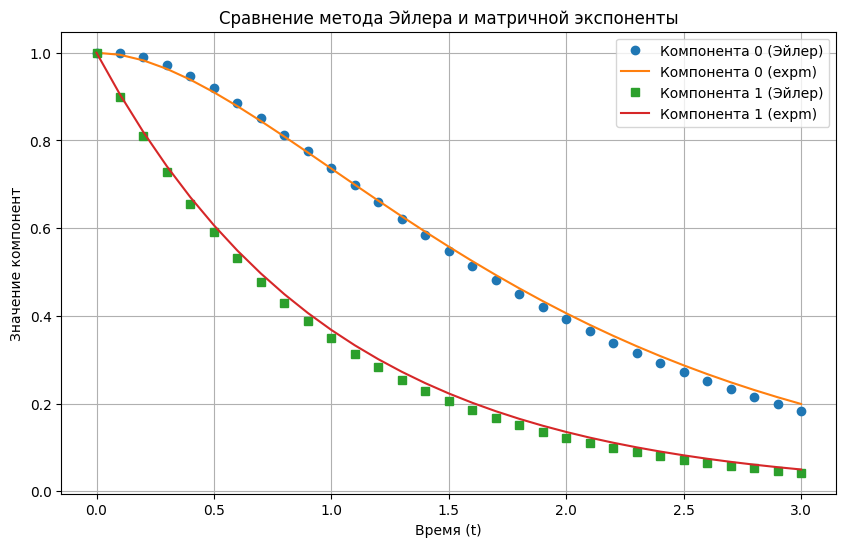

In [9]:
a = np.array([[-1, 1],
              [0, -1]], dtype=float)

# Решение методом Эйлера
t, y = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)

# Точное решение через матричную экспоненту
ym = mat_exp_solve(a, [1, 1], t)

# Графики
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], 'o', label='Компонента 0 (Эйлер)')
plt.plot(t, ym[:, 0], '-', label='Компонента 0 (expm)')

plt.plot(t, y[:, 1], 's', label='Компонента 1 (Эйлер)')
plt.plot(t, ym[:, 1], '-', label='Компонента 1 (expm)')

plt.xlabel('Время (t)')
plt.ylabel('Значение компонент')
plt.title('Сравнение метода Эйлера и матричной экспоненты')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Задача 3

In [10]:
A = np.array([[-10, 10],
              [32, -499]])

eigenvalues = np.linalg.eigvals(A)
print("Собственные значения:", eigenvalues)

Собственные значения: [  -9.34647667 -499.65352333]


Система жесткая, так как собственные числа сильно отличаются

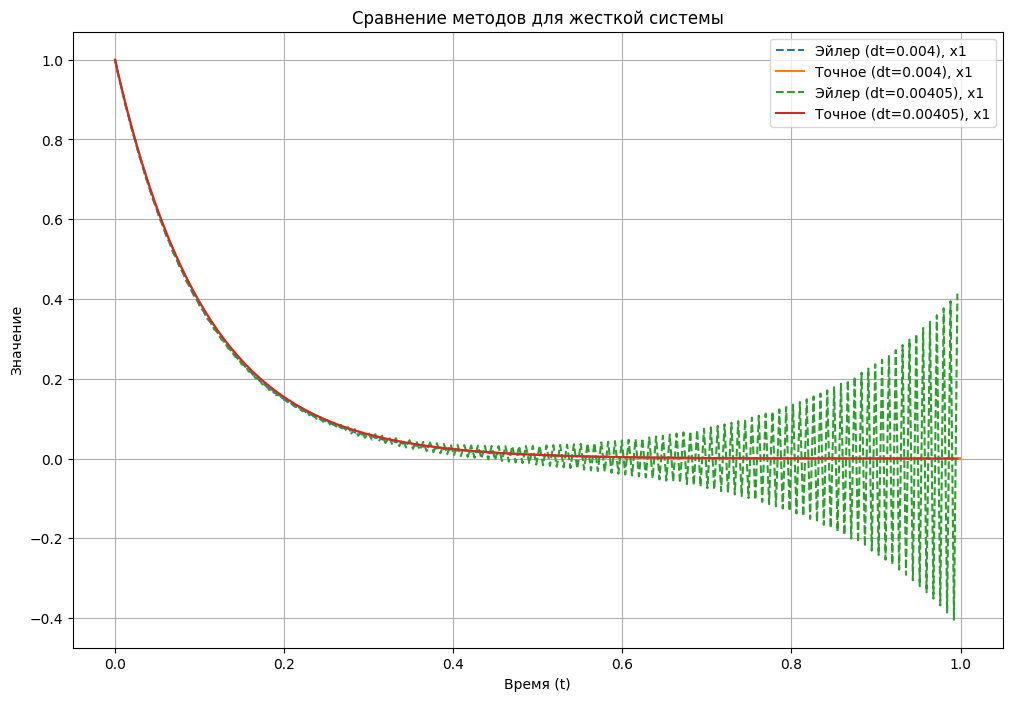

In [21]:
u0 = np.array([1, 0])
T = 1
dt_list = [0.004, 0.00405]

# Графики
plt.figure(figsize=(12, 8))
for dt in dt_list:
    t, y = euler_solve2(A, u0, T, dt)
    ym = mat_exp_solve(A, u0, t)
    plt.plot(t, y[:, 0], '--', label=f'Эйлер (dt={dt}), x1')
    plt.plot(t, ym[:, 0], '-', label=f'Точное (dt={dt}), x1')


plt.xlabel('Время (t)')
plt.ylabel('Значение')
plt.title('Сравнение методов для жесткой системы')
plt.legend()
plt.grid(True)
plt.show()

Неявный метод Эйлера:

$u_{k+1}=u_k+τAu_{k+1} ⟹u_{k+1}=(I−τA)^{−1}u_k$

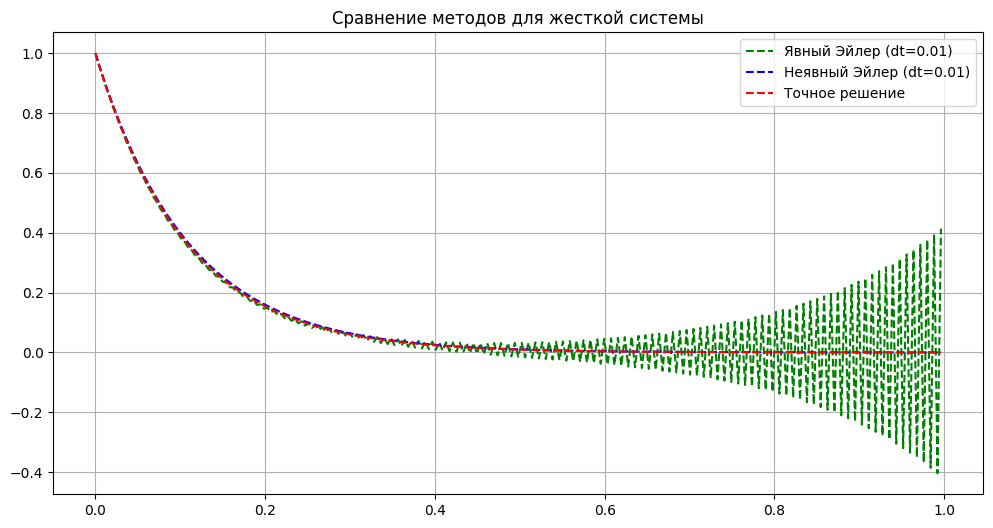

In [32]:
def euler_solve3(a, u0, T, dt):
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.zeros((num_steps + 1, len(u0)))
    y[0, :] = u0
    I = np.eye(len(u0))
    for k in range(num_steps):
        y[k + 1, :] = np.linalg.solve(I - dt * a, y[k, :])
    return tt, y

# Сравнение явной и неявной схем
dt = 0.00405
t, y_explicit = euler_solve2(A, u0, T, dt)
t, y_implicit = euler_solve3(A, u0, T, dt)
ym = mat_exp_solve(A, u0, t)

plt.figure(figsize=(12, 6))
plt.plot(t, y_explicit[:, 0], 'g--', label='Явный Эйлер (dt=0.01)')
plt.plot(t, y_implicit[:, 0], 'b--', label='Неявный Эйлер (dt=0.01)')
plt.plot(t, ym[:, 0], 'r--', label='Точное решение')
plt.title('Сравнение методов для жесткой системы')
plt.legend()
plt.grid(True)
plt.show()

Неявный Эйлер и точное решение почти совпадают, в то время как явный Эйлер неустойчив при выбранном значении интервала разбиения. (ГРАФИК ПОСТРОЕН ДЛЯ ОДНОЙ ИЗ КОМПОНЕНТ ВЕКТОРА u)

## Задача 6

Переходим к системе уравнений первого порядка заменой $\frac{du}{dt}=v$

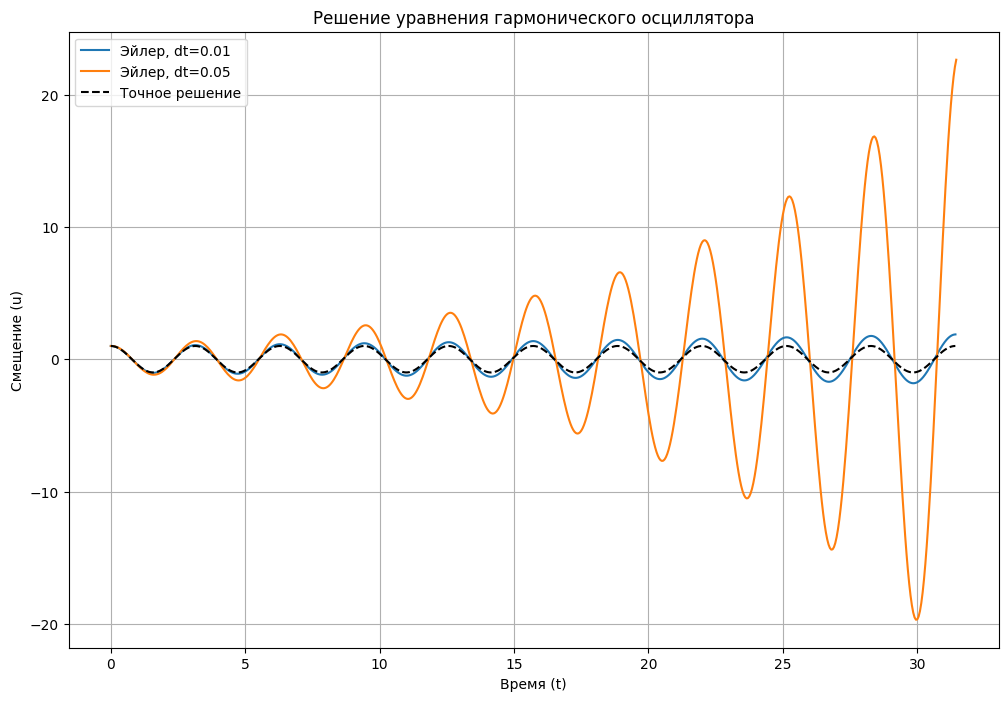

In [42]:
omega = 2.0  
T_period = 2 * np.pi / omega  

# Начальные условия
u0 = 1.0  # начальное смещение
v0 = 0.0  # начальная скорость
y0 = [u0, v0]

# Функция правой части системы
def harmonic_ode(t, y):
    return [y[1], -omega**2 * y[0]]

# Явный метод Эйлера
def euler_solve(f, y0, t_span, dt):
    t = np.arange(t_span[0], t_span[1] + dt, dt)
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    for i in range(1, len(t)):
        y[i, :] = y[i-1, :] + dt * np.array(f(t[i-1], y[i-1, :]))
    return t, y

t_span = [0, 10 * T_period]
dt_list = [0.01, 0.05]  

plt.figure(figsize=(12, 8))
for dt in dt_list:
    t, y = euler_solve(harmonic_ode, y0, t_span, dt)
    plt.plot(t, y[:, 0], label=f'Эйлер, dt={dt}')

# Точное решение (аналитическое)
t_exact = np.linspace(0, 10 * T_period, 1000)
u_exact = u0 * np.cos(omega * t_exact)
plt.plot(t_exact, u_exact, 'k--', label='Точное решение')

plt.xlabel('Время (t)')
plt.ylabel('Смещение (u)')
plt.title('Решение уравнения гармонического осциллятора')
plt.legend()
plt.grid(True)
plt.show()

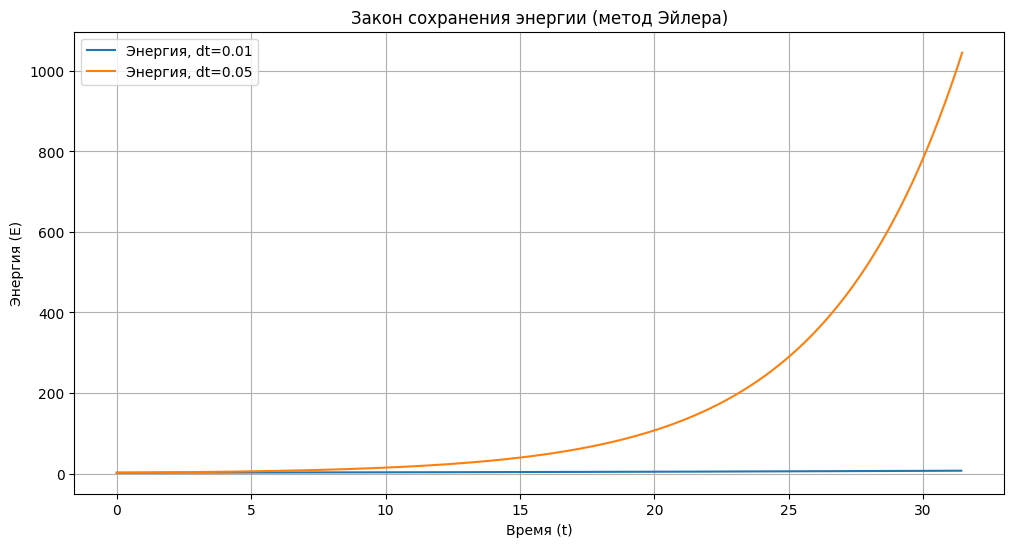

In [35]:
def energy(y, omega):
    return 0.5 * y[:, 1]**2 + 0.5 * omega**2 * y[:, 0]**2

plt.figure(figsize=(12, 6))
for dt in dt_list:
    t, y = euler_solve(harmonic_ode, y0, t_span, dt)
    E = energy(y, omega)
    plt.plot(t, E, label=f'Энергия, dt={dt}')

plt.xlabel('Время (t)')
plt.ylabel('Энергия (E)')
plt.title('Закон сохранения энергии (метод Эйлера)')
plt.legend()
plt.grid(True)
plt.show()

При решении явным методом Эйлера наблюдаем неустойчивость для зависимости координаты от времени, а также невыполнение закона сохранения

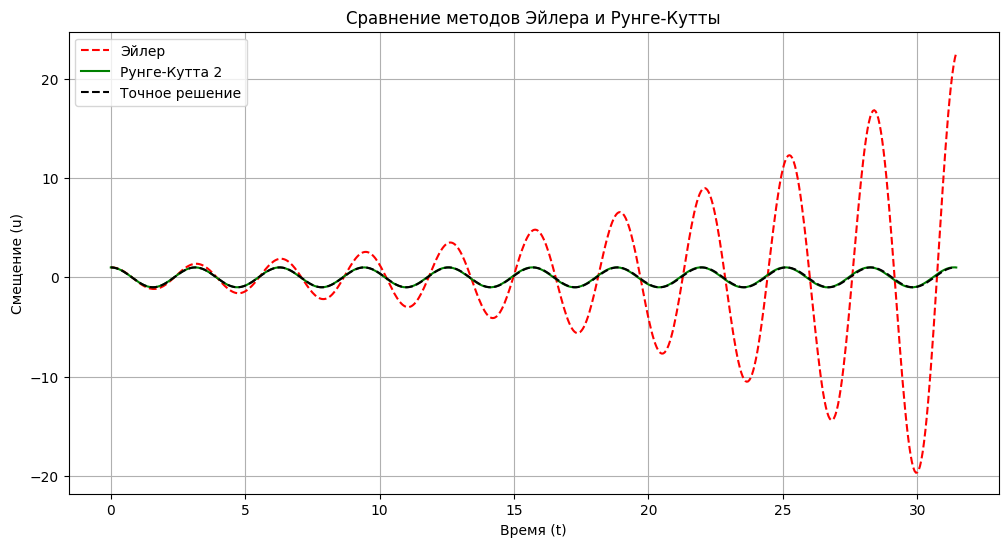

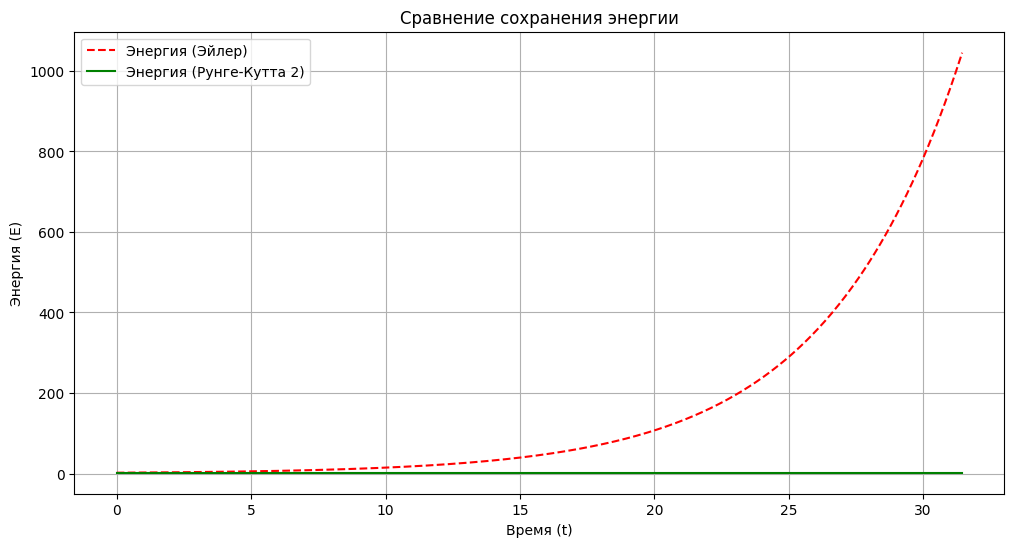

In [37]:
def rk2_solve(f, y0, t_span, dt):
    t = np.arange(t_span[0], t_span[1] + dt, dt)
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    for i in range(1, len(t)):
        k1 = np.array(f(t[i-1], y[i-1, :]))
        k2 = np.array(f(t[i-1] + dt, y[i-1, :] + dt * k1))
        y[i, :] = y[i-1, :] + dt * (k1 + k2) / 2
    return t, y

# Сравнение методов
dt = 0.05
t_euler, y_euler = euler_solve(harmonic_ode, y0, t_span, dt)
t_rk2, y_rk2 = rk2_solve(harmonic_ode, y0, t_span, dt)

plt.figure(figsize=(12, 6))
plt.plot(t_euler, y_euler[:, 0], 'r--', label='Эйлер')
plt.plot(t_rk2, y_rk2[:, 0], 'g-', label='Рунге-Кутта 2')
plt.plot(t_exact, u_exact, 'k--', label='Точное решение')
plt.xlabel('Время (t)')
plt.ylabel('Смещение (u)')
plt.title('Сравнение методов Эйлера и Рунге-Кутты')
plt.legend()
plt.grid(True)
plt.show()

# Проверка энергии
E_euler = energy(y_euler, omega)
E_rk2 = energy(y_rk2, omega)

plt.figure(figsize=(12, 6))
plt.plot(t_euler, E_euler, 'r--', label='Энергия (Эйлер)')
plt.plot(t_rk2, E_rk2, 'g-', label='Энергия (Рунге-Кутта 2)')
plt.xlabel('Время (t)')
plt.ylabel('Энергия (E)')
plt.title('Сравнение сохранения энергии')
plt.legend()
plt.grid(True)
plt.show()

Метод Рунге-Кутты на порядок лучше явного метода Эйлера

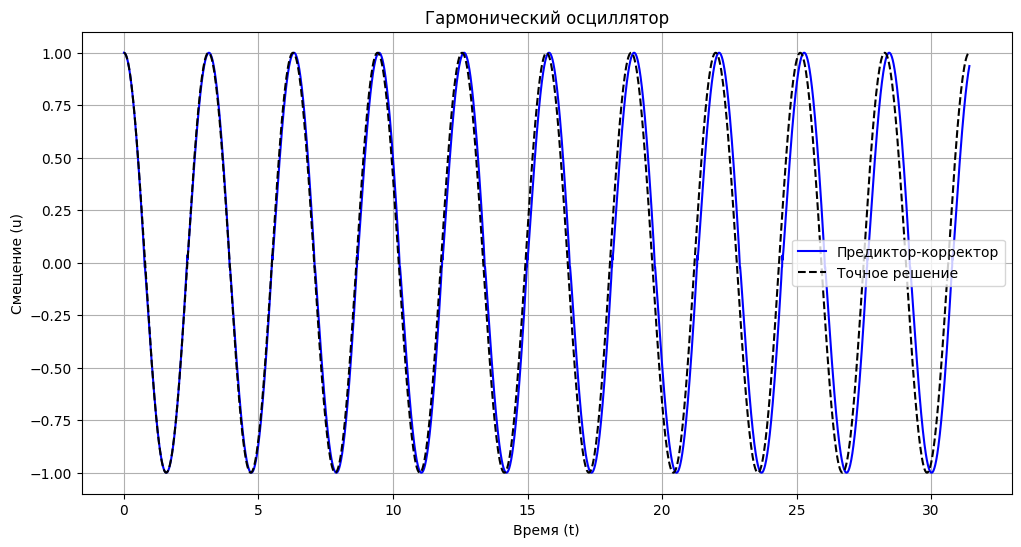

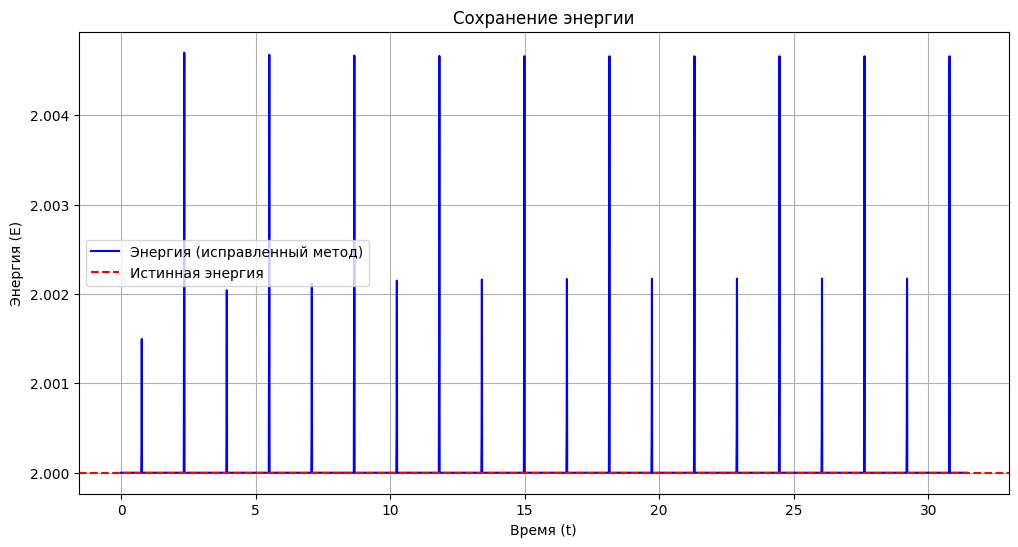

In [ ]:
def predictor_corrector(t_span, dt):
    t = np.arange(t_span[0], t_span[1] + dt, dt)
    y = np.zeros((len(t), 2))
    y[0, :] = [1,0]
    for i in range(1, len(t)):
        # Предиктор 
        y[i, :] = y[i-1, :] + [dt*y[i-1, 1], -omega**2 * y[i-1, 0]*dt]
        # Корректор 
        E = 2
        u_corr = np.sqrt(np.absolute(2 * E - y[i,1]**2))/omega * np.sign(y[i,0])
        y[i, :] = [u_corr,y[i,1]]
    return t, y

# Интегрирование
t_span = [0, 10*T_period]
dt = 0.01
t_pc, y_pc = predictor_corrector(t_span, dt)

# Точное решение
t_exact = np.linspace(0, 10 * T_period, 1000)
u_exact = u0 * np.cos(omega * t_exact)

# Графики
plt.figure(figsize=(12, 6))
plt.plot(t_pc, y_pc[:, 0], 'b-', label='Предиктор-корректор')
plt.plot(t_exact, u_exact, 'k--', label='Точное решение')
plt.xlabel('Время (t)')
plt.ylabel('Смещение (u)')
plt.title('Гармонический осциллятор')
plt.legend()
plt.grid(True)
plt.show()


# Проверка энергии
E_pc = energy(y_pc, omega)

plt.figure(figsize=(12, 6))
plt.plot(t_pc, E_pc, 'b-', label='Энергия (исправленный метод)')
plt.axhline(0.5 * omega**2 * u0**2, color='r', linestyle='--', label='Истинная энергия')
plt.xlabel('Время (t)')
plt.ylabel('Энергия (E)')
plt.title('Сохранение энергии')
plt.legend()
plt.grid(True)
plt.show()
